In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras import models, layers, optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.python.client import device_lib
from warnings import filterwarnings

import utils

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context('notebook')
filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
device = tf.test.gpu_device_name()
if device != '/device:GPU:0':
    raise SystemError('GPU device not found.')
print(device)

SystemError: GPU device not found.

In [4]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10706636998015278027]

# Fully Connected NN

In [5]:
# Load the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Reshape and scale the data
train_data_dense = train_data.reshape((60000, 28 * 28))
train_data_dense = train_data_dense.astype('float32') / 255
test_data_dense = test_data.reshape((10000, 28 * 28))
test_data_dense = test_data_dense.astype('float32') / 255

# Use one-hot encoding on labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_data_dense.shape, train_labels.shape, test_data_dense.shape, test_labels.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [7]:
# Build fully connected network
model_dense = models.Sequential()
model_dense.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model_dense.add(layers.Dense(10, activation='softmax'))

# Compile it
model_dense.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Fit the model
history = model_dense.fit(train_data_dense,
                          train_labels,
                          epochs=10,
                          batch_size=64,
                          validation_data=[test_data_dense, test_labels])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2215 - acc: 0.9355 - val_loss: 0.1200 - val_acc: 0.9645
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0926 - acc: 0.9722 - val_loss: 0.0887 - val_acc: 0.9749
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0641 - acc: 0.9809 - val_loss: 0.0971 - val_acc: 0.9702
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0468 - acc: 0.9862 - val_loss: 0.0727 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0364 - acc: 0.9890 - val_loss: 0.0735 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0298 - acc: 0.9912 - val_loss: 0.0796 - val_acc: 0.9780
Epoch 7/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0229 - acc: 0.9931 - val_loss: 0.0786 - val_acc

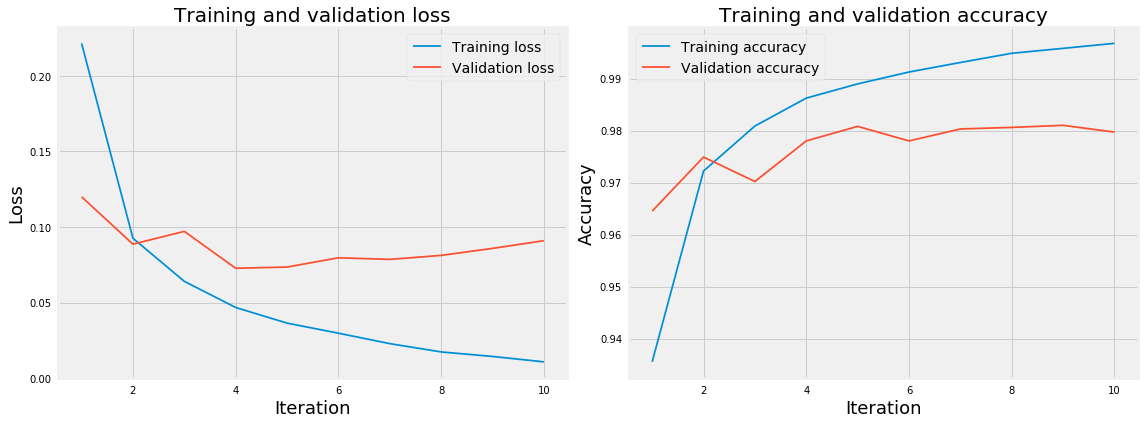

In [8]:
utils.plot_loss_and_metric(history, metric_name='acc')

In [9]:
model_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Convolutional NN

In [10]:
# Reshape train and test data
train_data_conv = train_data.reshape((60000, 28, 28, 1))
train_data_conv = train_data_conv.astype('float32') / 255
test_data_conv = test_data.reshape((10000, 28, 28, 1))
test_data_conv = test_data_conv.astype('float32') / 255

train_data_conv.shape, test_data_conv.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
# Build Conv network
model_conv = models.Sequential()
model_conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_conv.add(layers.MaxPool2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.MaxPool2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(64, activation='relu'))
model_conv.add(layers.Dense(10, activation='softmax'))

model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [16]:
# Compile it
model_conv.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Fit the model
history = model_conv.fit(train_data_conv,
                         train_labels,
                         epochs=10,
                         batch_size=64,
                         validation_data=[test_data_conv, test_labels])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0114 - acc: 0.9970 - val_loss: 0.0394 - val_acc: 0.9926
Epoch 2/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.0098 - acc: 0.9976 - val_loss: 0.0403 - val_acc: 0.9921
Epoch 3/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.0099 - acc: 0.9976 - val_loss: 0.0491 - val_acc: 0.9923
Epoch 4/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.0084 - acc: 0.9978 - val_loss: 0.0697 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0089 - acc: 0.9978 - val_loss: 0.0686 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0079 - acc: 0.9981 - val_loss: 0.0634 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0080 - acc: 0.9983 - val_loss: 0.

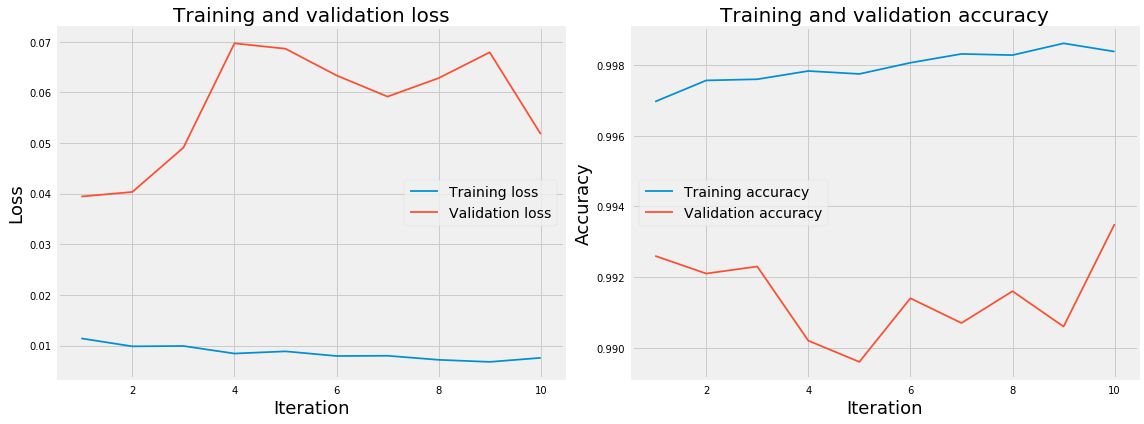

In [17]:
utils.plot_loss_and_metric(history, metric_name='acc')